# Simulation file

This Jupyter Notebook contains the functions needed to call for running complete simulations, storing the produced data and visualizing the results. It will make use of classes.py as main input source.

### Import packages

In [1]:
import numpy as np
import scipy as sc
from scipy.integrate import RK45
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from astroquery.jplhorizons import Horizons
import datetime
import sys
import control as c
import serial as serial
import sliplib as slip
import classes as cl
from astropy.time import Time


### Create main simulation function

In [2]:
"""
For the simulation to run, a number of input values are needed. These are:
- Reference quaternions
- Quaternion attitude at t = 0
- Angular velocity at t = 0
- Time array for simulation, based on mission geometry
- Simulation time step

Starting off simply, a number of assumptions will be made on the ki, kp, kd values, as well as on the disturbance torques. Time array will not be retrieved from the mission geometry yet either.

EULER INTEGRATOR to be changed to RK4 INTEGRATOR
"""

def simulation(quaternion_ref_vector, quaternion_0_vector, omega_0, start, stop, dt):

    time_array = np.linspace(start, stop, int(stop/dt) + 1)
    
    vis = cl.Visualization(time_array)    
    const = cl.Constants()
    rot = cl.Rotation()
    pd = cl.PID(const.inertia_matrix)

    # Dummy values
    factor_p = 5e-3
    factor_i = 1e-10
    factor_d = 2e-1
    k_p = np.array([1,1,1]) * factor_p
    k_i = np.array([1,1,1]) * factor_i
    k_d = np.array([1,1,1]) * factor_d
    T_d = np.array([1e-7, 1e-7, 1e-7])

    # Initialize individual vectors for iteration
    q_ref = quaternion_ref_vector
    q = quaternion_0_vector
    omega = omega_0
    T_c = 0

    # Initialize storage arrays for visualization
    q_ref_vis = np.empty((4, len(time_array)))
    q_vis = np.empty((4, len(time_array)))
    T_d_vis = np.empty((3, len(time_array)))
    T_c_vis = np.empty((3, len(time_array)))
    omega_vis = np.empty((3, len(time_array)))

    # Index count
    index = 0

    for t in time_array:
        # Append to visualisation arrays
        q_ref_vis[:, index] = q_ref
        q_vis[:,index] = q
        T_d_vis[:,index] = T_d
        T_c_vis[:,index] = T_c
        omega_vis[:,index] = omega

        # Calculate required variables, at t = 0
        T_c = pd.control_torque(q, q_ref, omega, k_p, k_i, k_d, dt)

        # Update to t = 1
        # Integrate omega and quaternion
        omega = pd.rk4_integrator(pd.derivative_omega, omega, dt, T_d, T_c)
        q = pd.rk4_integrator(pd.derivative_quaternion, q, dt, omega)
        q = q / np.linalg.norm(q)

        # if not np.isclose(np.linalg.norm(q), 1, atol=1e-6):
        #     print(f"Stopping simulation: quaternion norm deviated from 1 at time {t}")
        #     print(np.linalg.norm(q))
        #     break  # Exit the loop if the quaternion is no longer a unit quaternion

        # Update index
        index += 1

    # Data storage
    # None

    vis.quaternion_versus_time(q_ref_vis, q_vis)
    vis.control_torque_versus_time(T_c_vis)
    vis.disturbance_torque_versus_time(T_d_vis)
    vis.omega_versus_time(omega_vis)

    print(q)


    return 5


### Dummy setup


<Figure size 640x480 with 0 Axes>

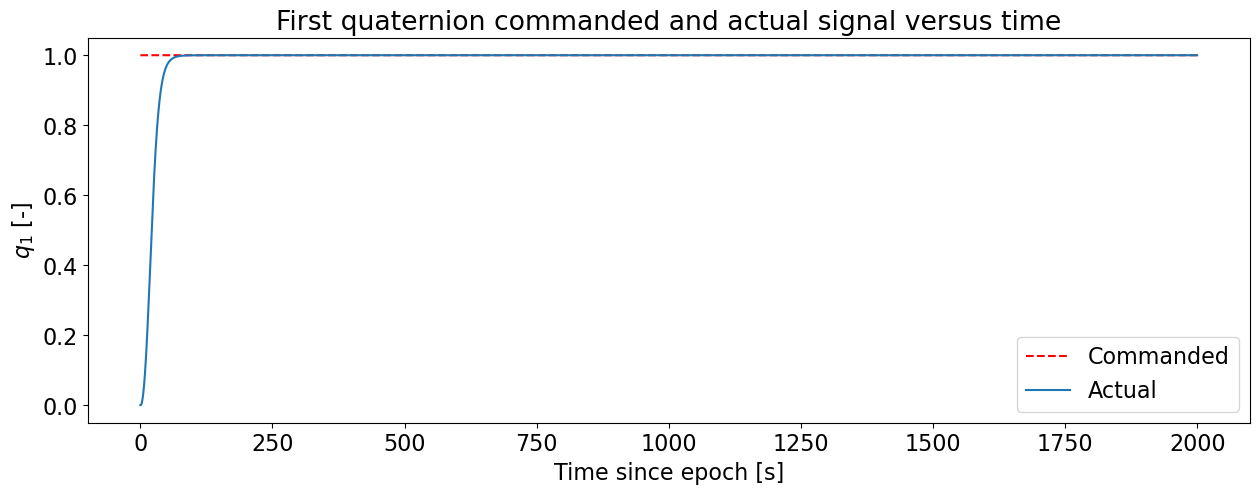

<Figure size 640x480 with 0 Axes>

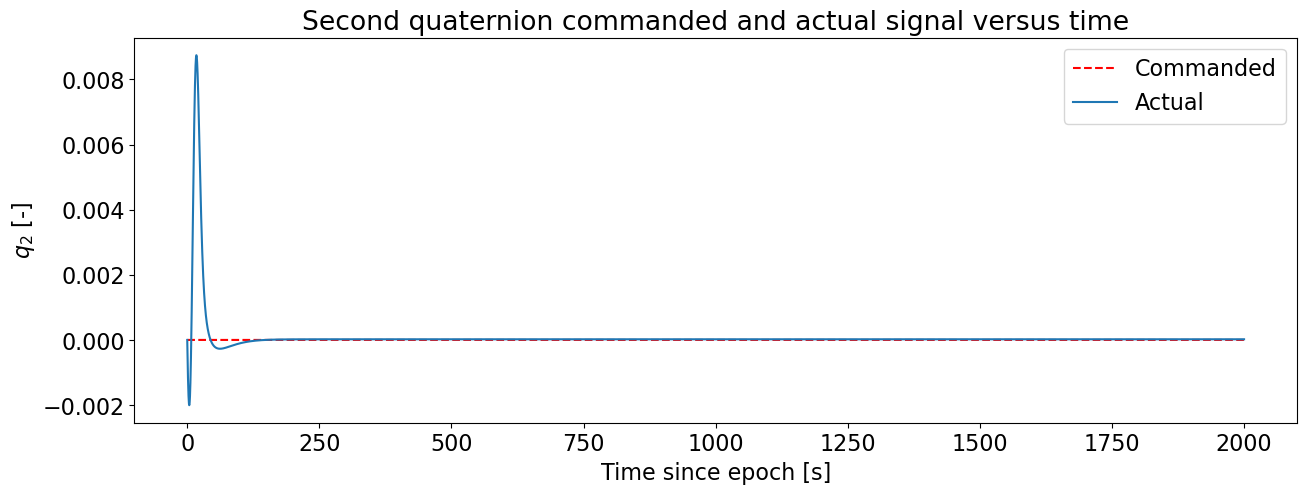

<Figure size 640x480 with 0 Axes>

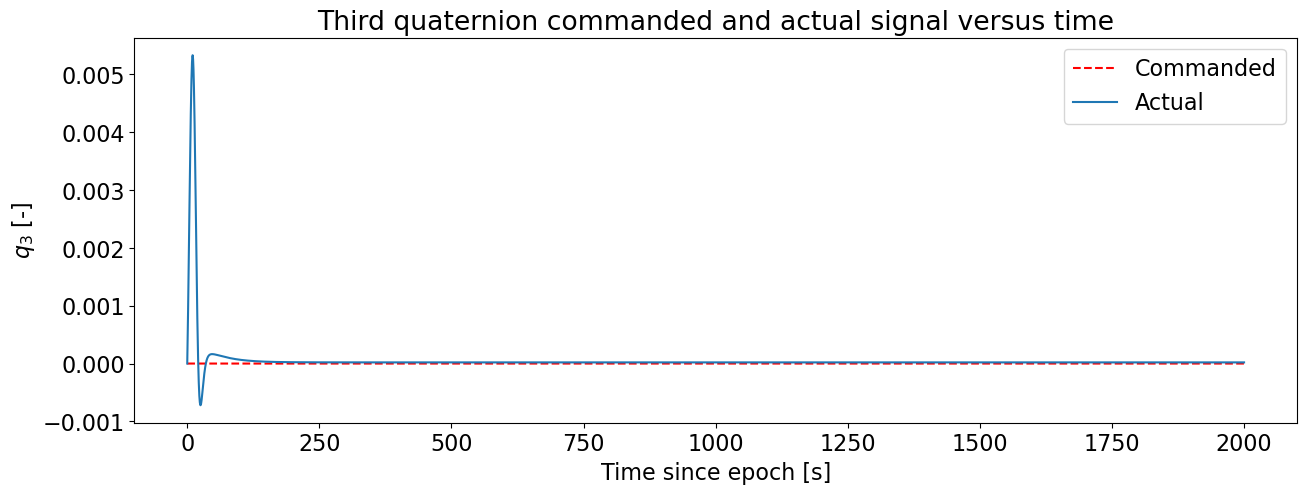

<Figure size 640x480 with 0 Axes>

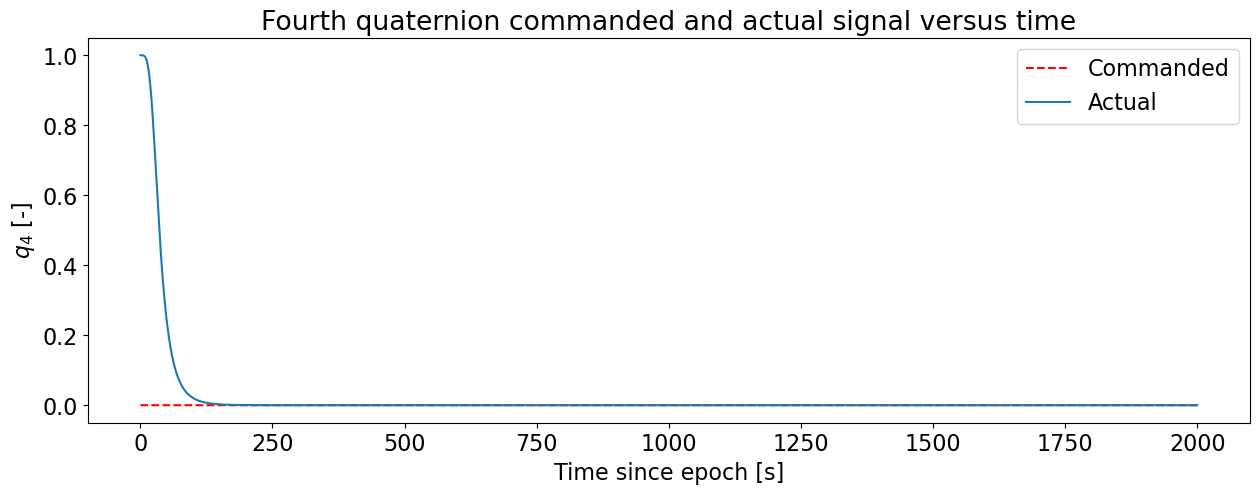

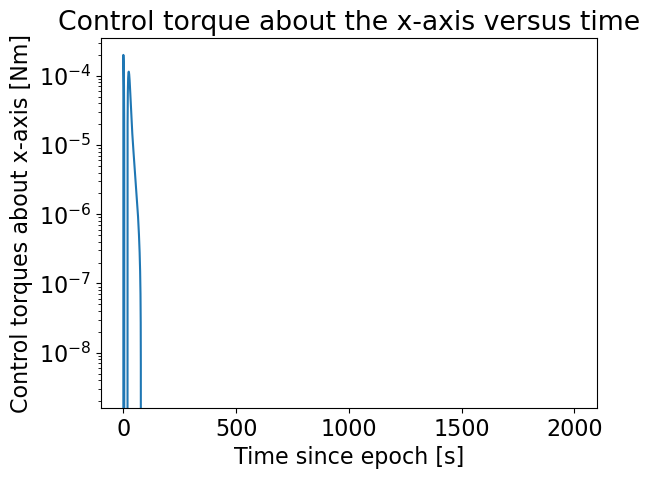

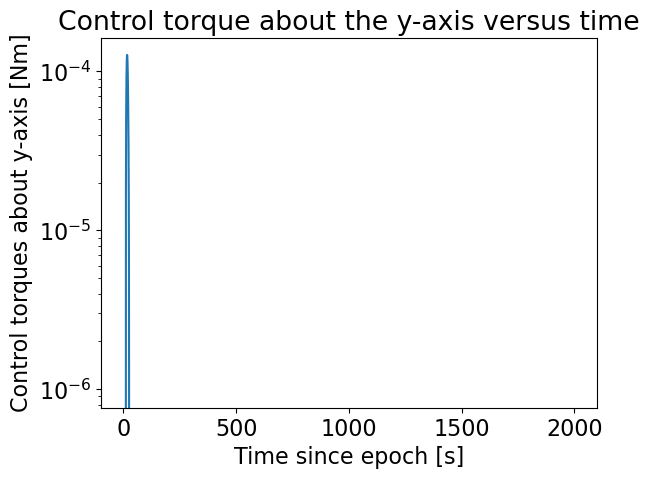

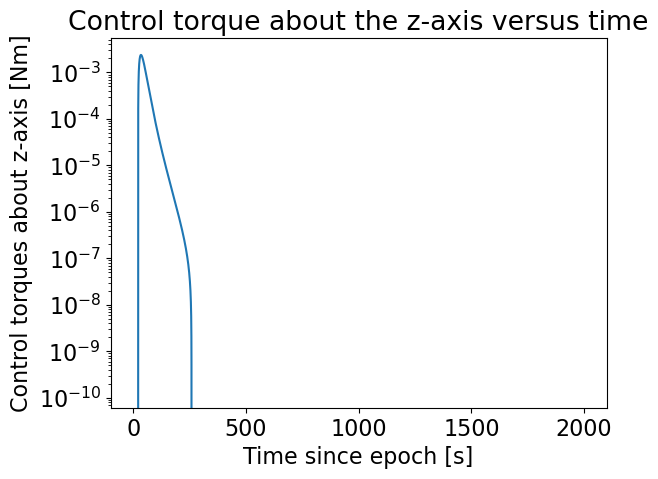

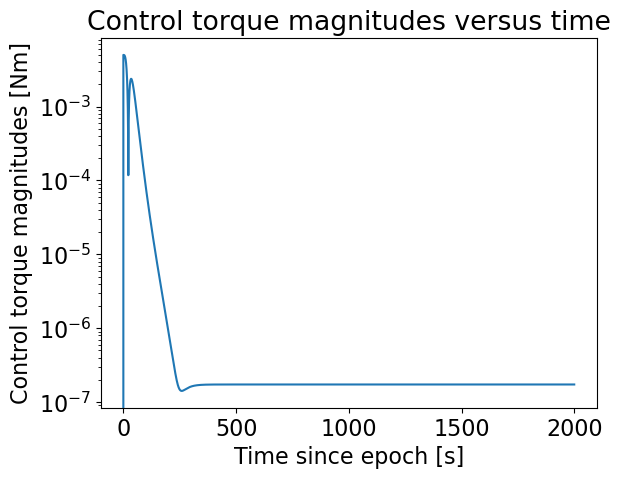

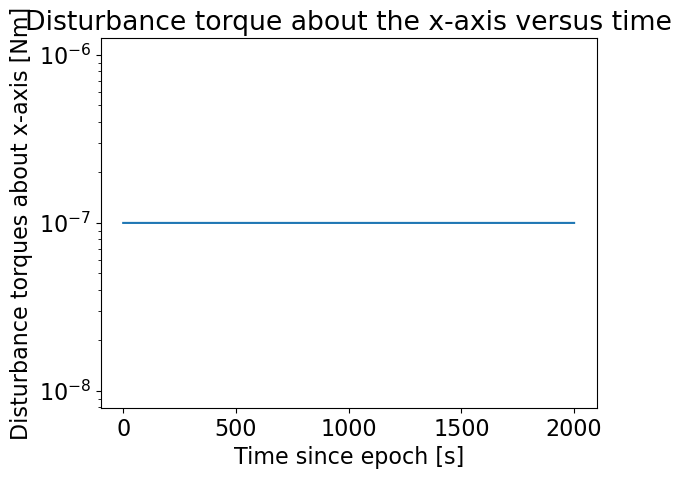

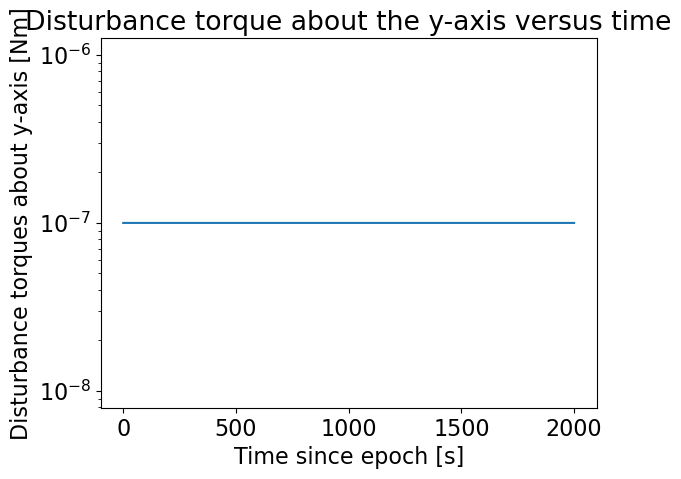

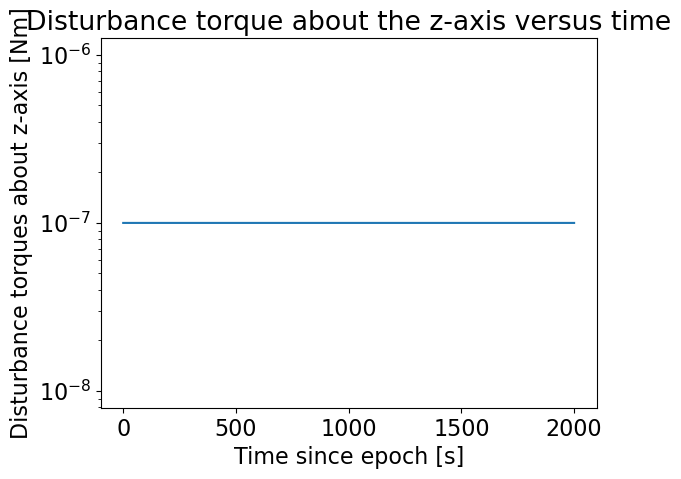

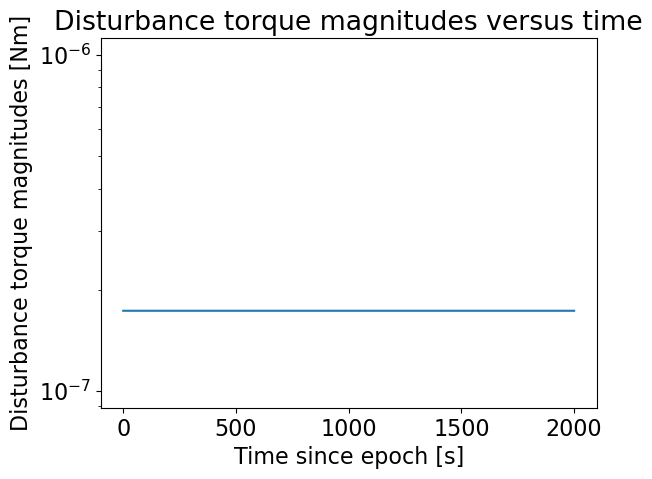

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

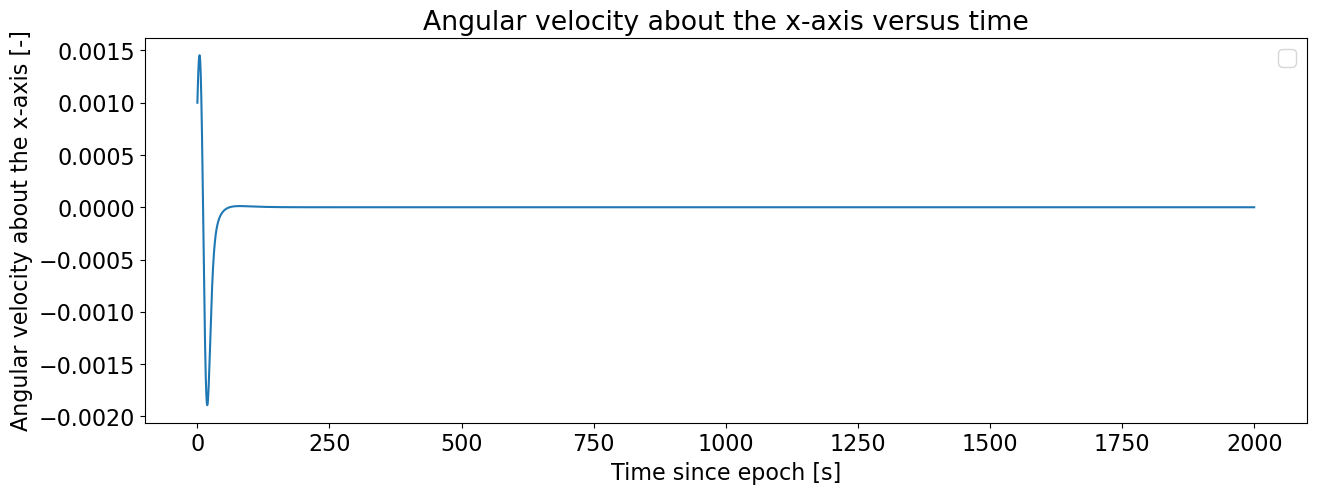

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

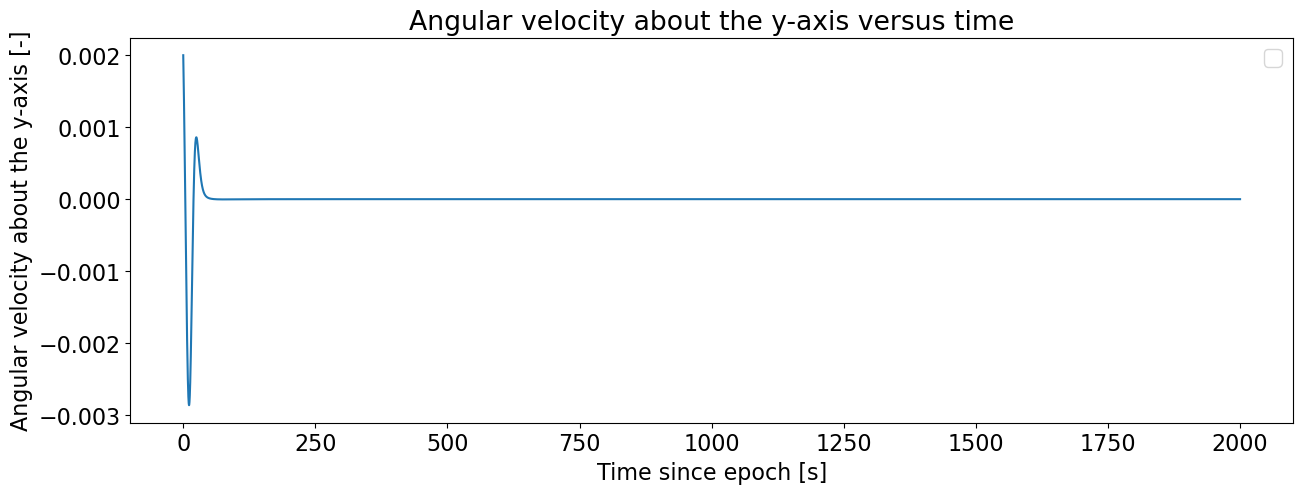

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

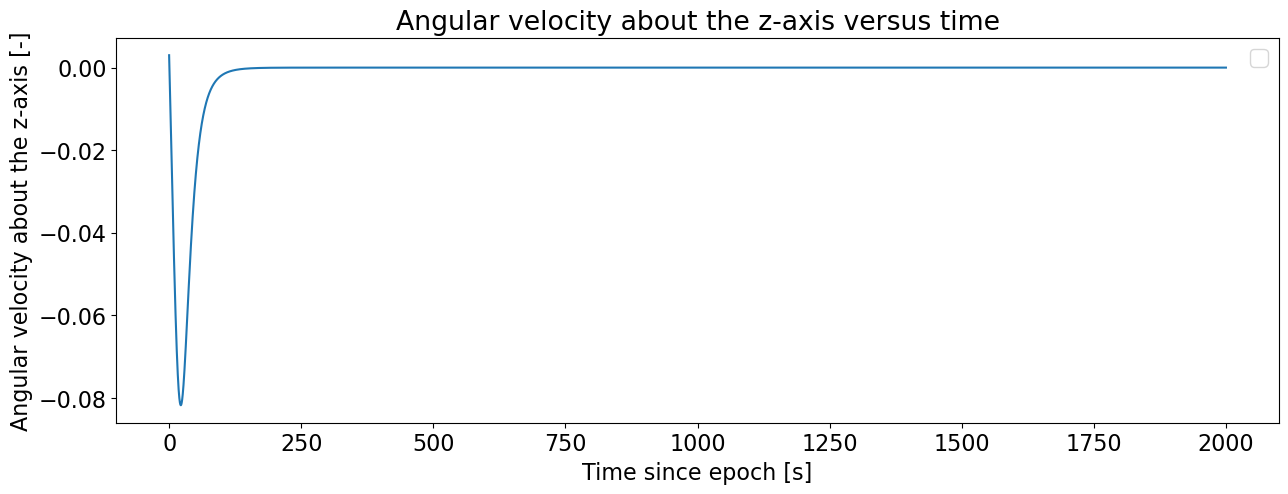

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 640x480 with 0 Axes>

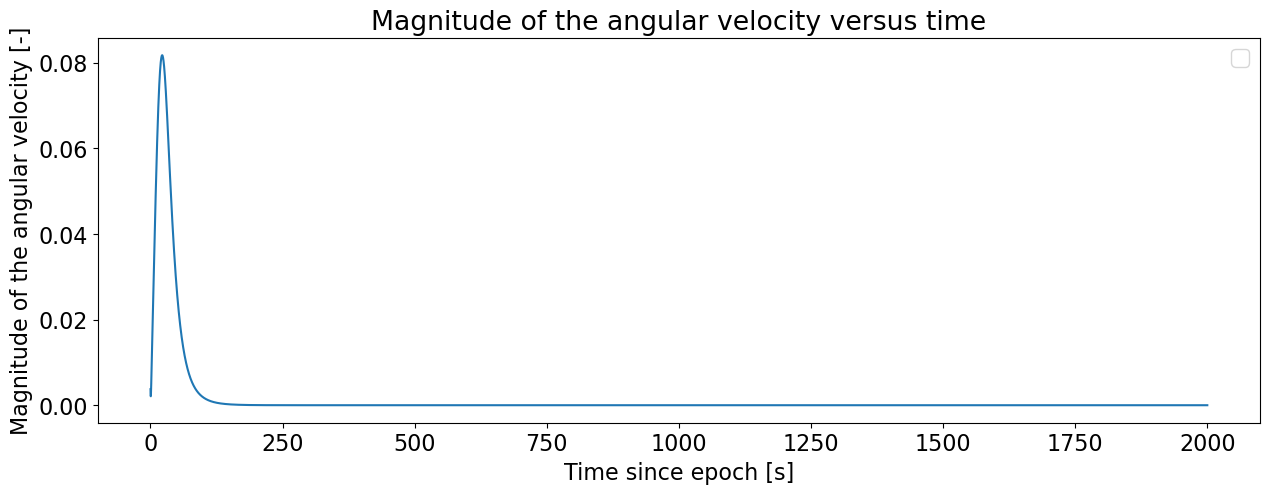

[9.99999999e-01 1.99971031e-05 1.99979269e-05 1.91869965e-05]


5

In [3]:
dt = 0.1
start = 0
stop = 2000
q_ref_0 = np.array([1.0, 0.0, 0.0, 0.0])
q_0 = np.array([0., 0., 0., 1.0])
omega_0 = np.array([0.001, 0.002, 0.003])

simulation(q_ref_0, q_0, omega_0, start, stop, dt)
